# **Bike-Sharing Rental**





---



**Problem Statement** :

 The business problem is to ensure a stable supply of rental bikes in urban cities by predicting the demand for bikes. By providing a stable supply of rental bikes, the system can enhance mobility comfort for the public and reduce waiting time, leading to greater customer satisfaction and accurately predicting bike demand can help bike sharing companies optimize operations including bike availability, pricing, strategies, and marketing efforts by considering demand Based on various external factors such as weather, season, holiday etc..,



**Bike-sharing rental**

Dataset Dictionary:

1	Instant:	Index number

2	Dteday:	Date (Format: YYYY-MM-DD)

3	Season :	Season Name

4	Yr :	Year

5	Month	: Month (1-12)(Jan-Dec)

6	Hr: 	Hour(0 to 23)

7	Holiday: 	Whether the holiday is there or not

8	Weekday	 : Day of the week

9	Workingday :	Whether it is a working day or not

10	Weathersit:	Weather situation

11	Temp:	Normalized temperature in Celsius

12	Atemp :	Normalized feeling temperature

13	Hum	: Normalized humidity. The Values are divided by 100

14	Windspeed	: Normalized Wind speed. Values are divided by 67

15	Casual	: Count of casual users

16	Registered :	Number of registered users

17	Cnt:	Count of total rental biked including both casual and registered




In [42]:
#importing required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [43]:
#Loading Data Set
data = pd.read_csv('/content/bike_rent (1).csv')

In [44]:
#data backup
dbackup=data.copy()

In [45]:
#EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   instant     17379 non-null  int64 
 1   dteday      17379 non-null  object
 2   season      17379 non-null  object
 3   yr          17379 non-null  object
 4   mnth        17379 non-null  object
 5   hr          17379 non-null  int64 
 6   holiday     17379 non-null  object
 7   weekday     17379 non-null  int64 
 8   workingday  17379 non-null  object
 9   weathersit  17379 non-null  object
 10  temp        17379 non-null  object
 11  atemp       17379 non-null  object
 12  hum         17379 non-null  object
 13  windspeed   17379 non-null  object
 14  casual      17379 non-null  object
 15  registered  17379 non-null  object
 16  cnt         17379 non-null  int64 
dtypes: int64(4), object(13)
memory usage: 2.3+ MB


**Observation**

Here we can obsereve that most of the data type is object which can cause our trouble in future so we will convert into suitable data type late


In [46]:
data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Observation**
There appears to be no missing values in data set

In [47]:
# Check for duplicated records
print(f'Duplicated records: {data.duplicated().sum()}')

Duplicated records: 0


**Observation**

There are no duplicate records

In [48]:
# Check for invalid records and convert object columns to appropriate numeric types
for column in ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  object 
 4   mnth        17379 non-null  object 
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  object 
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  object 
 9   weathersit  17379 non-null  object 
 10  temp        17368 non-null  float64
 11  atemp       17373 non-null  float64
 12  hum         17373 non-null  float64
 13  windspeed   17374 non-null  float64
 14  casual      17378 non-null  float64
 15  registered  17378 non-null  float64
 16  cnt         17379 non-null  int64  
dtypes: float64(6), int64(4), object(7)
memory usage: 2.3+ MB


**Observation**

We have successfully converted data type into suitable format for Analysis

In [50]:
# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)
data.describe()

,instant,hr,weekday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17368.000000,17373.000000,17373.000000,17374.000000,17378.000000,17378.000000,17379.000000
mean,8690.0000,11.546752,3.003683,0.497132,0.475851,0.627208,0.190080,35.676603,153.792554,189.463088
std,5017.0295,6.914405,2.005771,0.192525,0.171829,0.192939,0.122321,49.306423,151.359786,181.387599
min,1.0000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,12.000000,3.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,18.000000,5.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,23.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Observation**
Here we can see that casual ,registered and cnt have high Std which tells us that data is spreat out and outliers can be there


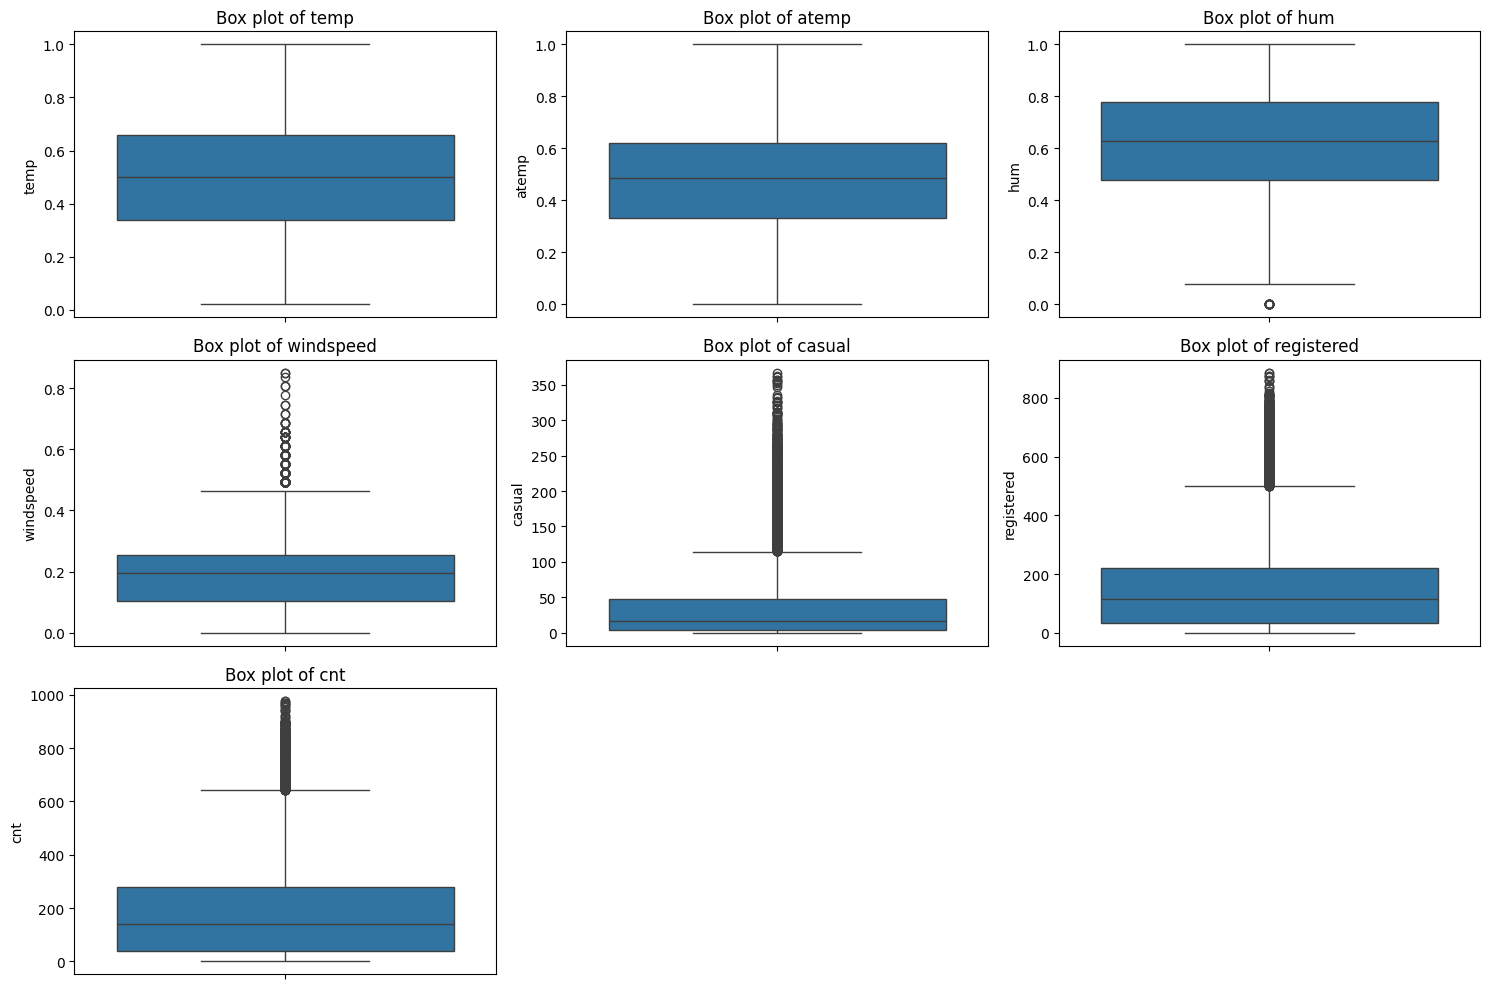

In [51]:
#Data Visulisation

# Detect outliers using box plots

plt.figure(figsize=(15, 10))
for i, column in enumerate(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')
plt.tight_layout()
plt.show()

**Observation**

The boxplot confirmed our insights drawm from  earlier statistics , there are high number of outliers in  casual, cnt and registered .
Additionally we found out there are some outliers in windspreed

Shape of dataset after removing outliers: (14944, 17)


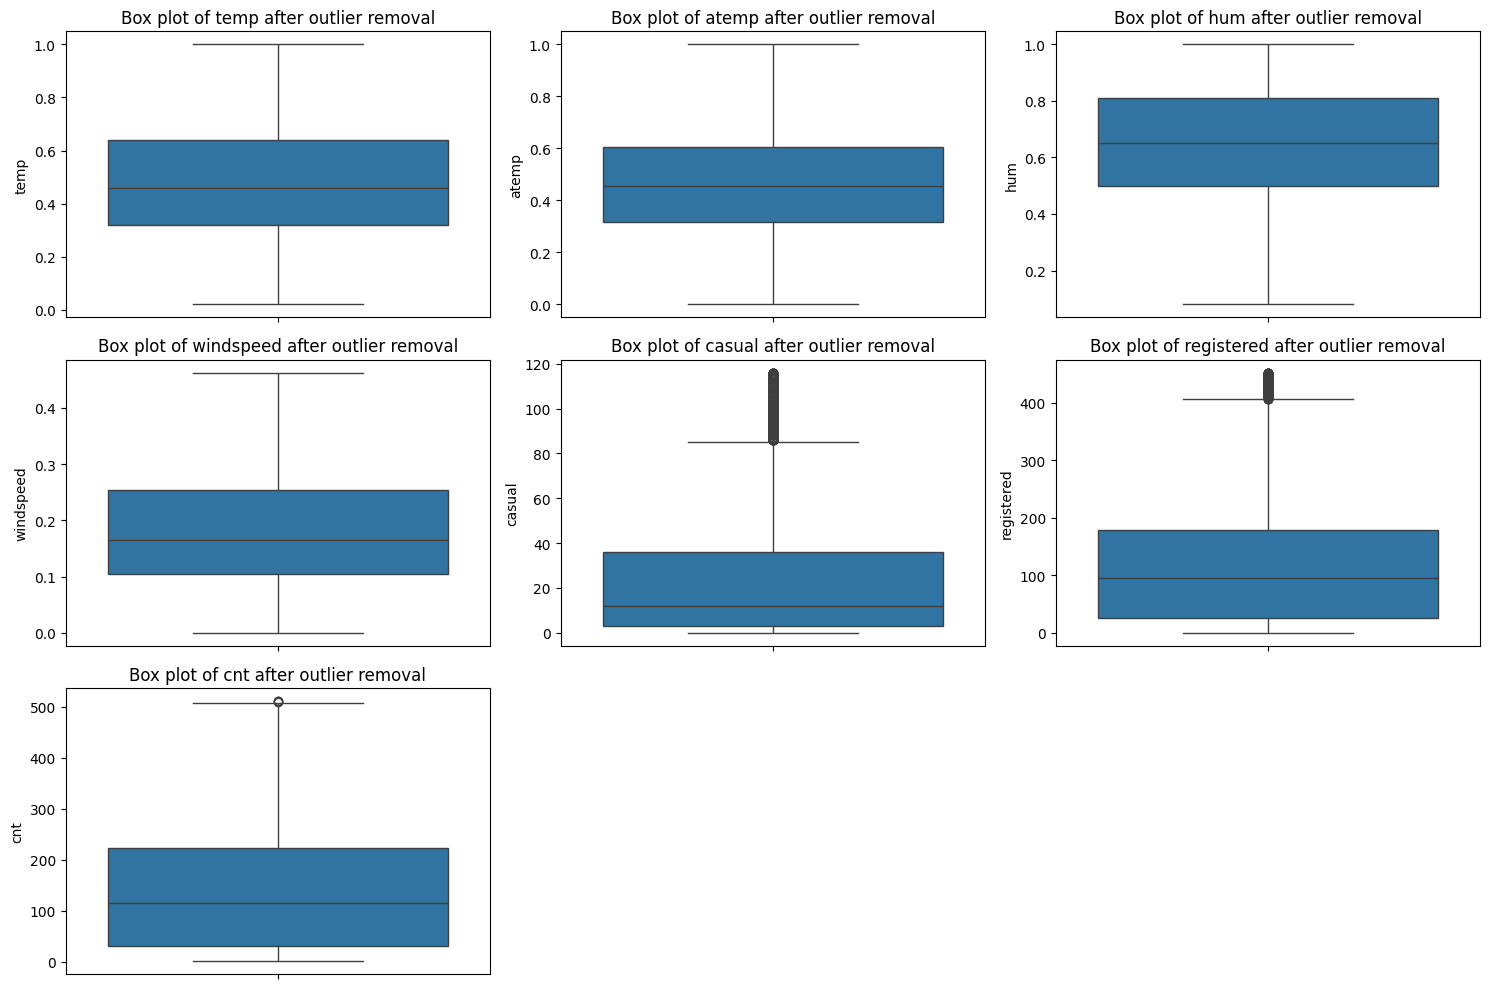

In [52]:
# Remove outliers using the Interquartile Range (IQR) method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']:
    data = remove_outliers(data, column)

# Display the shape of the dataset after removing outliers
print("Shape of dataset after removing outliers:", data.shape)

# Display box plots again to verify outlier removal
plt.figure(figsize=(15, 10))
for i, column in enumerate(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column} after outlier removal')
plt.tight_layout()
plt.show()


In [53]:
# Ensure that 'dteday' is in datetime format
data['dteday'] = pd.to_datetime(data['dteday'], dayfirst=True)

# Ensure that 'dteday' is in datetime format
data['dteday'] = pd.to_datetime(data['dteday'])

# Filter numeric columns for aggregation
numeric_columns = ['registered', 'casual', 'cnt']

# Aggregate data by day
daily_data = data.groupby('dteday')[numeric_columns].sum().reset_index()

# Aggregate data by month and year
data['month_year'] = data['dteday'].dt.to_period('M')
monthly_data = data.groupby('month_year')[numeric_columns].sum().reset_index()

# Aggregate data by year
data['year'] = data['dteday'].dt.year
yearly_data = data.groupby('year')[numeric_columns].sum().reset_index()

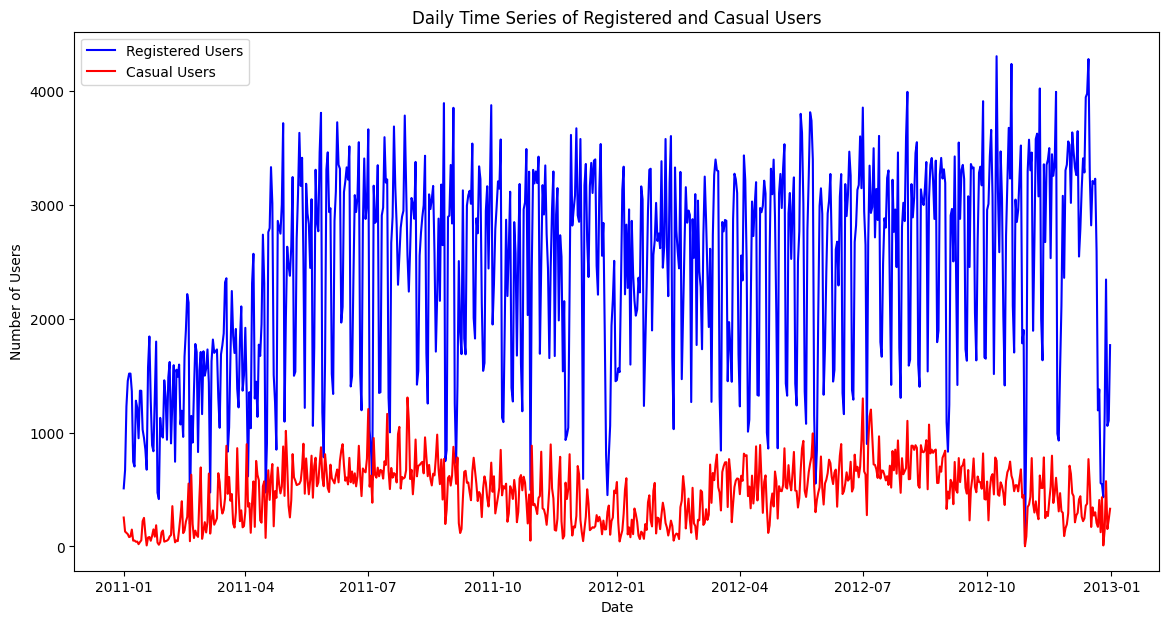

In [54]:
# Plot daily time series for registered and casual users
plt.figure(figsize=(14, 7))
plt.plot(daily_data['dteday'], daily_data['registered'], label='Registered Users', color='b')
plt.plot(daily_data['dteday'], daily_data['casual'], label='Casual Users', color='r')
plt.title('Daily Time Series of Registered and Casual Users')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.show()


**Observation**
The registered users  peak  at october  and the casual users peak at july

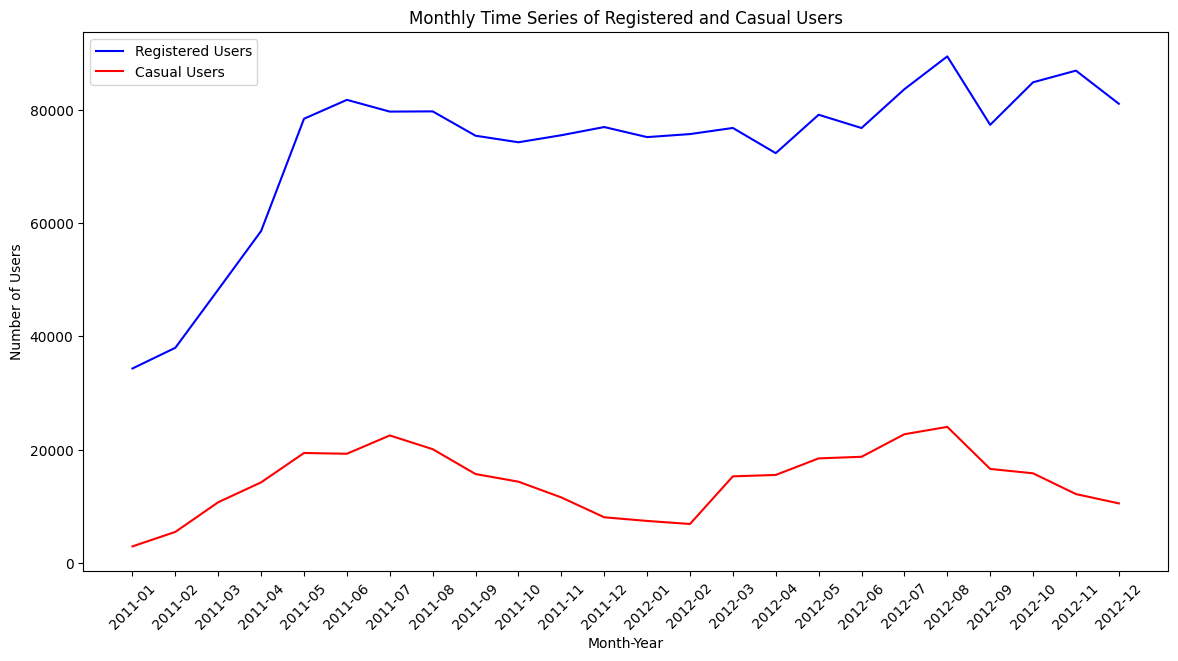

In [55]:
# Plot monthly time series for registered and casual users
monthly_data['month_year'] = monthly_data['month_year'].astype(str)
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['month_year'], monthly_data['registered'], label='Registered Users', color='b')
plt.plot(monthly_data['month_year'], monthly_data['casual'], label='Casual Users', color='r')
plt.title('Monthly Time Series of Registered and Casual Users')
plt.xlabel('Month-Year')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend()
plt.show()


**Oberservation**

**Casual USers:**

Every 2nd  Qauter the  casual users are at peak

Every 4th Qauter of year we can see there is drop at casual users

**Regsistered Users:**

 2011 Registered users hit peak in 2nd Quater and in 2012 they hit peak at 3rd Qauter

 Registered users only seem to be increasing by time with a slight variation  in between


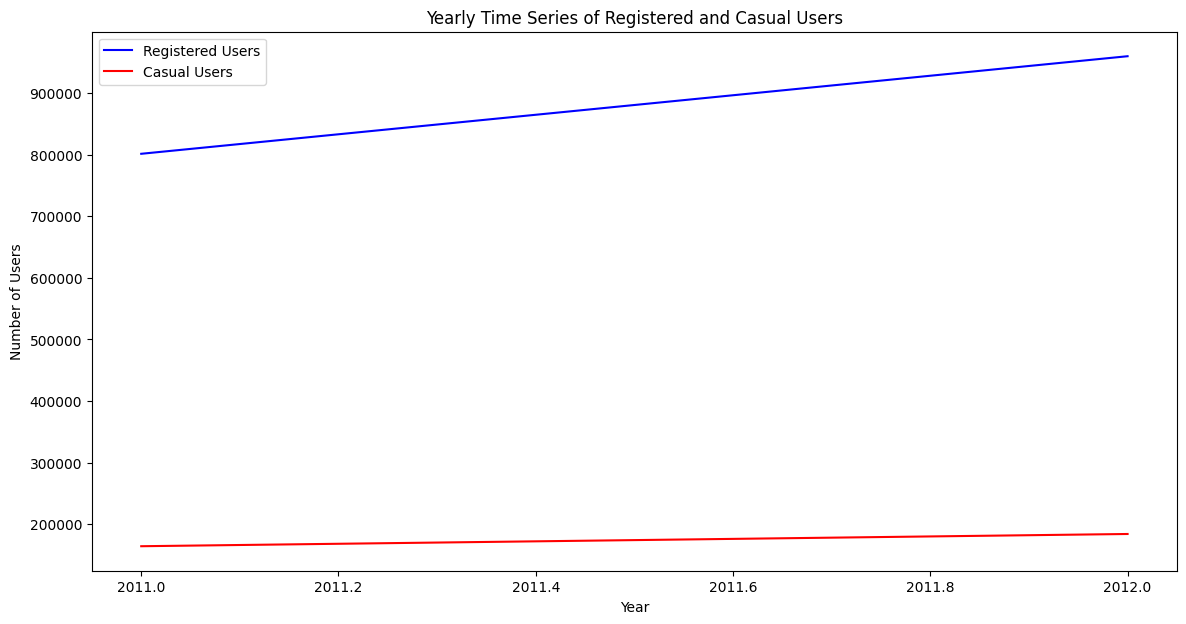

In [56]:
# Plot yearly time series for registered and casual users
plt.figure(figsize=(14, 7))
plt.plot(yearly_data['year'], yearly_data['registered'], label='Registered Users', color='b')
plt.plot(yearly_data['year'], yearly_data['casual'], label='Casual Users', color='r')
plt.title('Yearly Time Series of Registered and Casual Users')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.legend()
plt.show()


**Observation**

Registered users is showing signficant growth  and casual users are increasing too


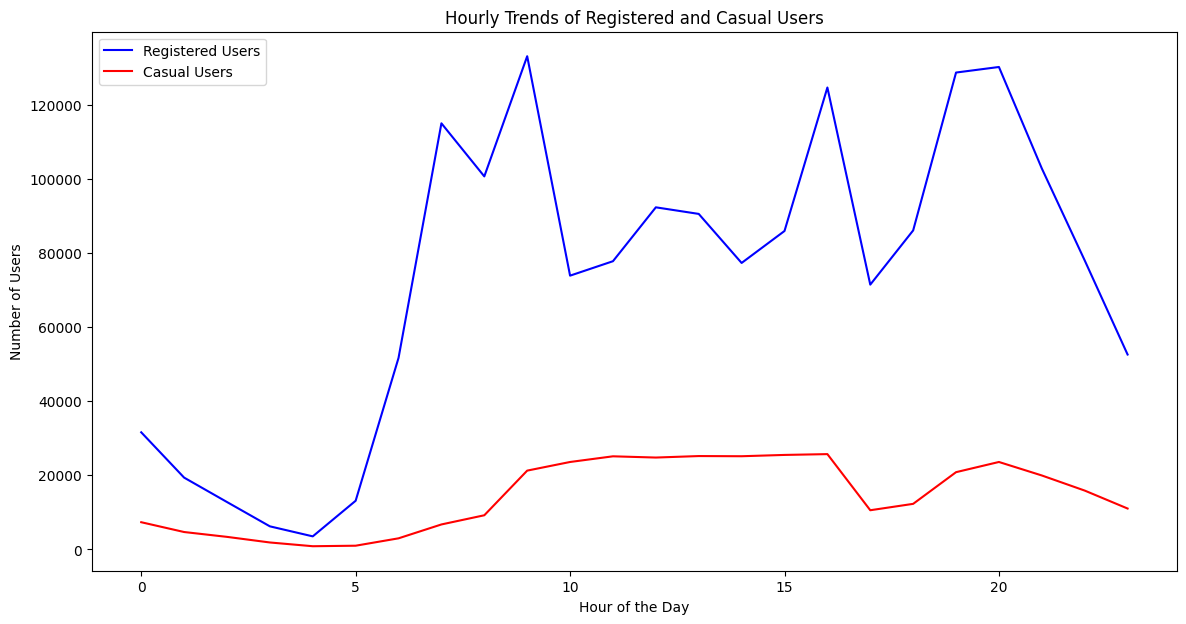

In [57]:
# Aggregate data by hour
hourly_data = data.groupby('hr')[numeric_columns].sum().reset_index()

# Plot hourly time series for registered and casual users
plt.figure(figsize=(14, 7))
plt.plot(hourly_data['hr'], hourly_data['registered'], label='Registered Users', color='b')
plt.plot(hourly_data['hr'], hourly_data['casual'], label='Casual Users', color='r')
plt.title('Hourly Trends of Registered and Casual Users')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Users')
plt.legend()
plt.show()


**Observation :**

Regisetered Users peak during early hours in day and during evening

Casual users peak during the afternoon


In [58]:
# Feature Engineering
# Extract relevant date components
data['year'] = data['dteday'].dt.year
data['month'] = data['dteday'].dt.month
data['day_of_week'] = data['dteday'].dt.dayofweek
data['hour'] = data['hr']

In [59]:
# Interaction features
data['weather_hour'] = data['weathersit'].astype(str) + '_' + data['hr'].astype(str)
data['weather_workingday'] = data['weathersit'].astype(str) + '_' + data['workingday'].astype(str)

In [60]:
# To predict trends
# Create lag features
data['lag_1'] = data['cnt'].shift(1)
data['lag_7'] = data['cnt'].shift(7)
data['lag_14'] = data['cnt'].shift(14)

In [61]:

data.shape

(14944, 27)

In [62]:
#To identify trends
# Create rolling mean features
data['rolling_mean_7'] = data['cnt'].rolling(window=7).mean()
data['rolling_mean_30'] = data['cnt'].rolling(window=30).mean()

data.shape

(14944, 29)

In [63]:
# Drop rows with NaN values
data = data.dropna()
data.shape

(14902, 29)

In [64]:
# List of columns to encode
categorical_columns = ['season', 'weathersit', 'holiday', 'workingday', 'weather_hour', 'weather_workingday']

# Instantiate the encoder
le = LabelEncoder()

# Apply label encoding to each column
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

data.head()

# Drop columns that won't be used
data = data.drop(columns=['dteday','instant'])

<ipython-input-64-54759961fac7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-64-54759961fac7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-64-54759961fac7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [65]:
# Define features and target variable
X = data.drop(columns=['cnt', 'casual', 'registered'])
y = data['cnt']



In [66]:
# Check for missing values in features
print(X.isna().sum())


season                0
yr                    0
mnth                  0
hr                    0
holiday               0
weekday               0
workingday            0
weathersit            0
temp                  0
atemp                 0
hum                   0
windspeed             0
month_year            0
year                  0
month                 0
day_of_week           0
hour                  0
weather_hour          0
weather_workingday    0
lag_1                 0
lag_7                 0
lag_14                0
rolling_mean_7        0
rolling_mean_30       0
dtype: int64


In [67]:
# Ensure all features are numeric
X = X.select_dtypes(include=[int, float])  # Select only numeric columns

# Handle any remaining non-numeric values
X = X.apply(pd.to_numeric, errors='coerce')
y = y[X.index]  # Align target variable with features

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

print("Scaling completed successfully.")

Scaling completed successfully.


In [68]:
X.head(20)



,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,month,day_of_week,hour,weather_hour,weather_workingday,lag_1,lag_7,lag_14,rolling_mean_7,rolling_mean_30
34,1,11,0,0,0,3,0.36,0.3333,0.71,0.2537,...,1,6,11,54,6,53.0,6.0,36.0,22.428571,32.333333
35,1,12,0,0,0,3,0.36,0.3333,0.66,0.2985,...,1,6,12,55,6,70.0,3.0,34.0,35.285714,34.900000
36,1,13,0,0,0,3,0.36,0.3485,0.66,0.1343,...,1,6,13,56,6,93.0,2.0,28.0,45.714286,36.066667
37,1,14,0,0,0,2,0.36,0.3485,0.76,0.1940,...,1,6,14,33,4,75.0,1.0,39.0,54.000000,37.600000
38,1,15,0,0,0,2,0.34,0.3333,0.81,0.1642,...,1,6,15,34,4,59.0,8.0,17.0,63.428571,40.033333
39,1,16,0,0,0,2,0.34,0.3333,0.71,0.1642,...,1,6,16,35,4,74.0,20.0,17.0,71.428571,42.533333
40,1,17,0,0,0,0,0.34,0.3333,0.57,0.1940,...,1,6,17,9,0,76.0,53.0,9.0,73.142857,44.633333
41,1,18,0,0,0,3,0.36,0.3333,0.46,0.3284,...,1,6,18,61,6,65.0,70.0,6.0,70.714286,46.300000
43,1,20,0,0,0,0,0.30,0.2727,0.39,0.3582,...,1,6,20,13,0,30.0,75.0,2.0,54.142857,46.566667
44,1,21,0,0,0,0,0.26,0.2273,0.44,0.3284,...,1,6,21,14,0,22.0,59.0,1.0,50.142857,44.466667


In [69]:
X.dropna()
X.shape

(14902, 21)

In [70]:
# Split the data into training and test sets while keeping indices
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y, range(len(X)), test_size=0.2, random_state=42
)


In [71]:
# Initialize the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_rmse = mean_squared_error(y_test, dt_y_pred, squared=False)
dt_r2 = r2_score(y_test, dt_y_pred)

print("Decision Tree Regressor:")
print(f"Root Mean Squared Error: {dt_rmse:.2f}")
print(f"Mean Squared Error: {dt_mse:.2f}")
print(f"R^2 Score: {dt_r2:.2f}")


Decision Tree Regressor:
Root Mean Squared Error: 41.13
Mean Squared Error: 1691.59
R^2 Score: 0.88


In [72]:
# Initialize the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the GradientBoostingRegressor model
gb_model.fit(X_train, y_train)

# Make predictions with GradientBoostingRegressor
gb_y_pred = gb_model.predict(X_test)

# Evaluate the GradientBoostingRegressor model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = mean_squared_error(y_test, gb_y_pred, squared=False)
gb_r2 = r2_score(y_test, gb_y_pred)

print("\nGradient Boosting Regressor:")
print(f"Root Mean Squared Error: {gb_rmse:.2f}")
print(f"Mean Squared Error: {gb_mse:.2f}")
print(f"R^2 Score: {gb_r2:.2f}")




Gradient Boosting Regressor:
Root Mean Squared Error: 37.50
Mean Squared Error: 1406.19
R^2 Score: 0.90


In [73]:
# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred =rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Root Mean Squared Error: {rf_rmse:.2f}")
print(f"Mean Squared Error: {rf_mse:.2f}")
print(f"R^2 Score: {rf_r2:.2f}")

Root Mean Squared Error: 28.86
Mean Squared Error: 833.07
R^2 Score: 0.94


In [74]:
# Initialize the AdaBoostRegressor model
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)

# Train the AdaBoostRegressor model
ada_model.fit(X_train, y_train)

# Make predictions with AdaBoostRegressor
ada_y_pred = ada_model.predict(X_test)

# Evaluate the AdaBoostRegressor model
ada_mse = mean_squared_error(y_test, ada_y_pred)
ada_rmse = mean_squared_error(y_test, ada_y_pred, squared=False)
ada_r2 = r2_score(y_test, ada_y_pred)

print("AdaBoost Regressor:")
print(f"Root Mean Squared Error: {ada_rmse:.2f}")
print(f"Mean Squared Error: {ada_mse:.2f}")
print(f"R^2 Score: {ada_r2:.2f}")

AdaBoost Regressor:
Root Mean Squared Error: 60.52
Mean Squared Error: 3662.44
R^2 Score: 0.74


In [75]:
# Initialize the XGBRegressor model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the XGBRegressor model
xgb_model.fit(X_train, y_train)

# Make predictions with XGBRegressor
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the XGBRegressor model
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_rmse = mean_squared_error(y_test, xgb_y_pred, squared=False)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("\nXGBoost Regressor:")
print(f"Root Mean Squared Error: {xgb_rmse:.2f}")
print(f"Mean Squared Error: {xgb_mse:.2f}")
print(f"R^2 Score: {xgb_r2:.2f}")


XGBoost Regressor:
Root Mean Squared Error: 28.62
Mean Squared Error: 819.25
R^2 Score: 0.94


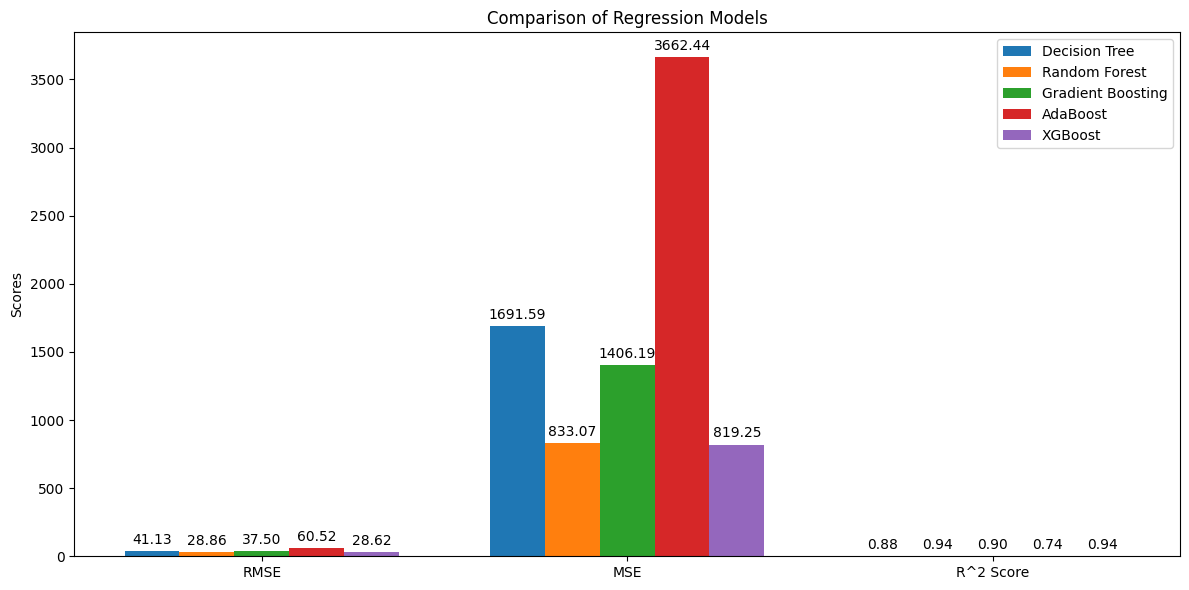

In [76]:
# Metrics
metrics = ['RMSE', 'MSE', 'R^2 Score']
dt_metrics = [dt_rmse, dt_mse, dt_r2]
rf_metrics = [rf_rmse, rf_mse, rf_r2]
gb_metrics = [gb_rmse, gb_mse, gb_r2]
ada_metrics = [ada_rmse, ada_mse, ada_r2]
xgb_metrics = [xgb_rmse, xgb_mse, xgb_r2]

# Create bar plot
x = np.arange(len(metrics))  # label locations
width = 0.15  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

bars_dt = ax.bar(x - 2*width, dt_metrics, width, label='Decision Tree')
bars_rf = ax.bar(x - width, rf_metrics, width, label='Random Forest')
bars_gb = ax.bar(x, gb_metrics, width, label='Gradient Boosting')
bars_ada = ax.bar(x + width, ada_metrics, width, label='AdaBoost')
bars_xgb = ax.bar(x + 2*width, xgb_metrics, width, label='XGBoost')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Attach a text label above each bar in *bars_dt*, *bars_rf*, *bars_gb*, *bars_ada*, and *bars_xgb*, displaying its height.
def autolabel(bars):
    """Attach a text label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_dt)
autolabel(bars_rf)
autolabel(bars_gb)
autolabel(bars_ada)
autolabel(bars_xgb)

fig.tight_layout()
plt.show()

In [77]:
X.columns

Index(['season', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'year', 'month', 'day_of_week',
       'hour', 'weather_hour', 'weather_workingday', 'lag_1', 'lag_7',
       'lag_14', 'rolling_mean_7', 'rolling_mean_30'],
      dtype='object')

In [78]:
# prompt: write a code for joblib to save model in collab

import joblib

# Assuming 'gb_model' is your best performing model
joblib.dump(rf_model, 'rf_model.pkl')


['rf_model.pkl']